# **QACES feature for jargon detection in Enterprise Search.**


* [Introduction to Jargon and Enterprises](#Introduction)
* [Loading the QAC history log file](#Loading)
* [Top 65 Queries](#Top65)
* [GPT-4 Synonyms](#GPT-4)
* [LLM Synonums](#Average)
* [Jargon detection](#Jangon)
* [Jargony](#Jargony)
* [LTR feature](#LTR)
* [Repeatability](#Verification)
* [References](#References)

# **Introduction to Jargon and Enterprises**  <a class="anchor"  id="Introduction"></a>
Enterprise Search (ES) can be simply defined as finding the information needed from within an organisation.   As illustrated below, ES is a federated store of workplace information with data gathered from multiple sources, such as intranets, document management systems,
e-mail and social media and may also include the organisation’s external-facing HTTP web servers(Kraswell et al, 2005).

Query auto-completion (QAC) is of particular importance to the field of Enterprise Search, where query suggestions can steer searchers to use the appropriate organisational jargon/terminology and avoid submitting
queries that produce no results.

Excessive use of jargon and terminology in organisations is often perceived as exclusionary. We use the
terms here in a positive context for efficiently conveying complex ideas, processes, or services among
employees/members who share common knowledge of the enterprise. In this context, jargon and terminology facilitate effective communication. The challenge of deciphering enterprise jargon/terminology within a
corpus lends itself to the fields of natural language processing (NLP) and large language models (LLM).

In [1]:
DEBUG='FALSE'
USE_CACHED_GPT_RESULTS='TRUE'

In [2]:
import numpy as np 
import pandas as pd 
import os

# **Loading the QAC history logfile**  <a class="anchor"  id="Loading"></a>

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/es-query-history/ws-query-history-v25.txt
/kaggle/input/es-query-history/es-query-history-v25.txt
/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt
/kaggle/input/hidden-abc/abc.env


In [4]:
# import the ES two-column query history 
query_history_file="/kaggle/input/es-query-history/es-query-history-v25.txt"
column_names = ['queries', 'volume']
es_df = pd.read_csv(
    query_history_file,
    sep ="\t",
    names=column_names,
    header=None
)

# add a counter column
initial_value = 1
es_df['counter'] = range(initial_value, len(es_df) +initial_value)

# **Top 65 Queries**  <a class="anchor"  id="Top65"></a>

In [5]:
# Truncate to use just top 65 queries 
# Without this truncation, the long tail will be excessively right-skewed
es_df = es_df.head(65)

In [6]:
from IPython.display import display_html 

number=65
es_df_top=es_df.head(number)

es_df_styler = es_df_top.style.set_table_attributes("style='display:inline'").set_caption('<b>ES Top Query Terms</b>')

#display_html(es_df_styler._repr_html_()+ws_df_styler._repr_html_(), raw=True)
display_html(es_df_styler._repr_html_(), raw=True)

,queries,volume,counter
0,scholarship,2148,1
1,fees,1941,2
2,library,1849,3
3,phd,1751,4
4,medicine,1573,5
5,psychology,1421,6
6,erasmus,1322,7
7,courses esc,1190,8
8,vacancies,1153,9
9,law,1128,10


# **GPT-4 Synonyms**  <a class="anchor"  id="GPT-4"></a>

In [7]:
try:
    import openai
except:
    !pip install openai
    import openai
    
from openai import OpenAI

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 6.9 MB/s eta 0:00:00


In [8]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv("/kaggle/input/hidden-abc/abc.env")
openai.api_key=os.getenv("OPENAI_API_KEY")

#print(openai.api_key)

In [9]:
arr = es_df_top['queries'].values.tolist()
print (arr)

['scholarship', 'fees', 'library', 'phd', 'medicine', 'psychology', 'erasmus', 'courses esc', 'vacancies', 'law', 'scholarships', 'accommodation', 'calendar', 'jobs', 'accomodation', 'computer science', 'accommodation contactus', 'apply', 'tuition', 'accommodation studentsandstaff', 'hr', 'english', 'book of kells', 'mba', 'engineering', 'music', 'business', 'secretary communications noticeboard', 'international', 'history', 'blackboard', 'nursing', 'courses', 'open day', 'application', 'graduatestudies students prospective awards', 'library bookofkells', 'fee', 'business msc international requirements', 'pharmacy', 'library bookofkells old library', 'human resources', 'dentistry', 'finance', 'master', 'careers', 'economics', 'exchange', 'ahss columbia', 'marketing', 'creativearts students current', 'film', 'study abroad', 'academic registry', 'orientation', 'architecture', 'masters', 'handbook', 'philosophy', 'admission', 'admissions', 'fis', 'data science', 'procurement', 'business m

**We need to break down the above array into smaller chunks to satisfy gpt-4 requirements.  Otherwise, the following message may appear: -**

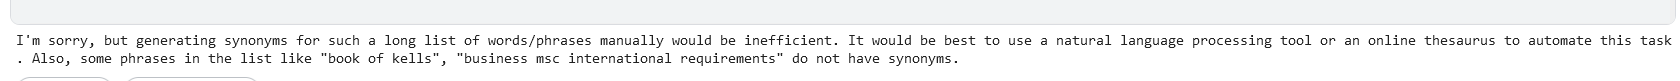

In [10]:

if DEBUG == 'TRUE':
    n = 8
    s = 0
    for s in 0,8,16,24,32,40,48,56,65:
        short_list = str(arr[s:n+s])[1:-1] 
        #print (short_list)
        my_messages=[
            {"role": "user", "content": "create a flat, sorted, unnumbered list the of top 10 synonym words or phrases for each of the words in the followin array: -"},
            {"role": "user", "content": 'please list them in lower case letters with a comma separator'},     
            {"role": "user", "content": short_list},
        ]
        print (my_messages)

In [11]:
MODEL = "gpt-4"
n = 8
s = 0

if USE_CACHED_GPT_RESULTS != 'TRUE': 
    for s in 0,8,16,24,32,40,48,56,64:
        short_list = str(arr[s:n+s])[1:-1] 
        my_messages=[
            {"role": "user", "content": "create a flat, sorted, unnumbered list the of top 10 synonym words or phrases for each of the words in the followin array: -"},
            {"role": "user", "content": 'please list them in lower case letters with a comma separator'},     
            {"role": "user", "content": short_list},
            ]
        response = client.chat.completions.create(
        model=MODEL,
        messages=my_messages,
        temperature=1,
        )
        print (response.choices[0].message.content)

print ("got here")


got here


# **NLP Synonyms**  <a class="anchor"  id="NLP"></a>

In [12]:
#nlp synonyms that match top 65 queries
import pandas as pd
#nlp_df = pd.read_csv('/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt',na_values='NaN')

#!grep query ^file


# Input
data_file = "/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt"

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
df = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
df = df.replace({'=>cl_[0-9]+$': ''}, regex=True)
print(df.fillna("").head(10))
df.shape


                       0                         1                   2   \
0            mailing list             mailing lists                       
1                  grouse                                                 
2                 diploma                   masters     masters courses   
3              employment  employment opportunities   job opportunities   
4            january 2022                term dates                       
5                  dargan                       m17      semester dates   
6  educational psychology                                                 
7       business analysis        business analytics  msc human resource   
8         colm cunningham            kingston mills                       
9                   tr031                     tr032               tr033   

               3      4      5      6  7  8  9   ... 18 19 20 21 22 23 24 25  \
0                                                ...                           
1             

(1000, 28)

# **Jargon Detection**  <a class="anchor"  id="Jargon"></a>

# **Jargony**  <a class="anchor"  id="Jargony"></a>

In [13]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    print (set2-set1)   # the words in list2 that do not exist in list1
    return intersection / union
    #print (set2-set1)

In [14]:
word2vec_list = ["Office of the registrar", "university records office", "student registration office", "Dean's office", "Admissions office", "students records office", "academic office", "enrolment office", "academic affairs office", "education office"]
llm_list = ["Office of the registrar", "Bizarre", "education office"]


In [15]:
jaccard_similarity(word2vec_list,llm_list)

{'Bizarre'}


0.18181818181818182

# **LTR Feature**  <a class="anchor"  id="LTR"></a>

# **References**  <a class="anchor"  id="References"></a>